# Hybrid Classic-Quantum Systems - Second Assignment #

You should fill in this Jupyter notebook in order to complete the assignment. Here a small recap of the rules:

* You should **NOT** modify the functions that are already provided in the notebook, unless it is strictly necessary;
* If you want to modify the given functions, please, provide an explanation of why you had to;
* You can define new functions, as soon as they are well commented;
* You can import all libraries you want, as soon as you justify their utilization;
* You can add new cells, as soon as you do not remove the cells where you are supposed to comment your solution;
* You are supposed to work by yourself - **plagiarism will not be tolerated**;
* Your solution should be commented and accompanied by a small description - you can add additional cells if needed;
* For any issue and doubt, please do not hesitate to use the forum or to write me an email.


## Exercise 1: Classic K-Means (25 points) ##
The first task you have to do for the assignment is the implementation of a classic version of k-means. This version will be used as a reference for your next exercises.

Some useful references:
* https://en.wikipedia.org/wiki/K-means_clustering
* NumPy reference: https://numpy.org/doc/stable/reference/
* Matplotlib reference: https://matplotlib.org/

In [59]:
# I added all the imports I needed for the first part of the project here
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt 

### Creation of the dataset ###
We create a simple multiclass dataset with normally distributed clusters of points. To do this, we use the *make_blobs* function from *scikit-learn*

In [60]:
def create_dataset(number_of_points, number_of_centers):
    data = make_blobs(n_samples=number_of_points, n_features=2, centers=number_of_centers, cluster_std=2, random_state=100)
    points = np.array(data[0])
    centers = np.array(data[1])
    
    return data, centers

dataset, centers = create_dataset(100,4)

### Normalize Input Points ###
We need to rescale the input in a specific interval.

In [61]:
def preprocess(data_points):
    data_p = np.array(data_points[0])
    n = len(data_p)
    print(n)
    x = 30.0 * np.sqrt(2)
    for i in range(0,n):
        data_p[i][:] += 15
        data_p[i][:] /= x
        
    return data_p

### Plot points ###

We can use this function to plot the points in the space during algorithm execution.

In [62]:
def draw_plot(points,centers,label=True):
    if label==False:
        plt.scatter(points[:,0], points[:,1])
    else:
        plt.scatter(points[:,0], points[:,1], c=centers, cmap='viridis')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

### Plot Centroids ###
You can use this function to check the update of the centroids.

In [63]:
def plot_centroids(centers):
    plt.scatter(centers[:,0], centers[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

### Initialize Centroids ###
The first step of the algorithm is to initialize the centroids in the space, that will be updated in further iterations of the algorithm.

In [64]:
def initialize_centroids(points,k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

To initialize the centroids I used the Forgy method, that consists in randomly choosing k points from the dataset and use them as centroids.

### Find nearest neighbors ###
Now we need to find the closest center for each point. This computation depends on the distance function that we want to use.
I modified the name of given function *dist_func* to be consistent with the incoming quantum version.

In [65]:
def classic_dist(point, centroid):
    return np.linalg.norm(point-centroid)

In [66]:
def get_distances(points, centroids, dist_func=classic_dist):
    # calculate the distance between each point and each centroid 
    distances = np.zeros((len(points),len(centroids)))
    for i in range(len(points)):
        for j in range(len(centroids)):
            distances[i][j] = dist_func(points[i], centroids[j])
    return distances

I used the euclidean distance function to find the nearest neighbors, which is the most common distance function used in k-means clustering. The euclidean distance is the square root of the sum of the squared differences between the two vectors. In this case, the two vectors are the point and the centroid. The function returns the index of the centroid that is closest to the point.
To speed up the computation, I used the numpy function np.linalg.norm() to compute the euclidean distance.
The euclidean distance is defined as:
$$
d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
$$

In [67]:
def find_nearest_neighbour(points, centroids, dist_func=classic_dist):
    distances = get_distances(points, centroids, dist_func)
    # find the index of the minimum value in each row, which is the nearest centroid
    nearest_neighbour = np.argmin(distances, axis=1) 
    # return the index of the nearest centroids for each point at a given index
    return nearest_neighbour

Once we calculated the distance between the point and the centroids, we need to find the minimum distance between the ones we computed, finding the centroid that is closest to the point: this is the nearest neighbour function.
$$
{\displaystyle S_{i}^{(t)}=\left\{x_{p}:\left\|x_{p}-m_{i}^{(t)}\right\|^{2}\leq \left\|x_{p}-m_{j}^{(t)}\right\|^{2}\ \forall j,1\leq j\leq k\right\},}
$$

### Find centroids ###
Finally, we update centroids based on the nearest centers for each point.
I changed the name of the function *update_centroids* to distinguish it from the median version.

In [68]:
def find_centroids_mean(points, centers, dist_func=classic_dist):
    centroids = np.zeros(centers.shape)
    nearest_neighbours = find_nearest_neighbour(points, centers, dist_func)
    for i in range(len(centers)):
        centroids[i] = np.mean(points[nearest_neighbours == i], axis=0)
    return centroids

To find the new centroids, we need to compute the mean of the closest points for each centroid. The mean is computed as the sum of the points divided by the number of points. The function returns the new centroids.
$$
{\displaystyle m_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}
$$

### Main k-means loop ###

In [69]:
def cluster(points, k, dist_func, find_centroids_func):

    # run k-means algorithm
    centroids = initialize_centroids(points, k)  # Intialize centroids
    i = 0
    while True:
        new_centroids = find_centroids_func(points, centroids, dist_func)
        if np.array_equal(new_centroids, centroids):
            break
        else:
            i += 1
            centroids = new_centroids

    draw_plot(points, find_nearest_neighbour(points, centroids, dist_func), label=True)
    print("Number of iterations: ", i)

The main loop of the algorithm is composed of the following steps:
* Initialize centroids with the Forgy method;
* Compute the distance between each point and the centroids;
* Find the nearest centroid for each point (nearest neighbor);
* Update the centroids based on the nearest neighbors;
* Repeat until the centroids do not change anymore.

The convergence condition is reached when the centroids do not change anymore.

100


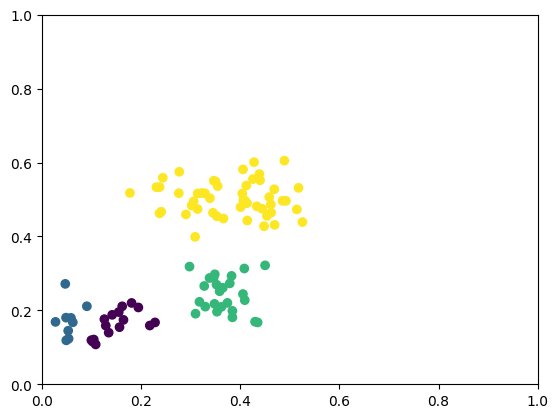

Number of iterations:  4


In [70]:
n = 100  # number of data points
k = 4  # Number of centers

points, o_centers = create_dataset(n, k)  # dataset
points = preprocess(points)  # Normalize dataset

cluster(points, k, classic_dist, find_centroids_mean)

### Bonus question ###
* Modify your implementation into k-medians.
* Compare the results for the two algorithms: can you see any difference?
**ADD MORE CELLS BELOW TO ANSWER THESE QUESTIONS**

Let's modify the function *find_centroids()* to compute the median instead of the mean. To do this, I used the numpy function *np.median()*.
The algorithm is practically the same, the only difference is that we compute the median instead of the mean.

In [71]:
def find_centroids_median(points, centers, dist_func=classic_dist):
    centroids = np.zeros(centers.shape)
    nearest_neighbours = find_nearest_neighbour(points, centers, dist_func)
    for i in range(len(centers)):
        centroids[i] = np.median(points[nearest_neighbours == i], axis=0)
    return centroids

Now, let's compare the results for the two algorithms. 

In [72]:
n = 1000  # number of data points
k = 30  # Number of centers

points, o_centers = create_dataset(n, k)  # dataset
points = preprocess(points)  # Normalize dataset

1000


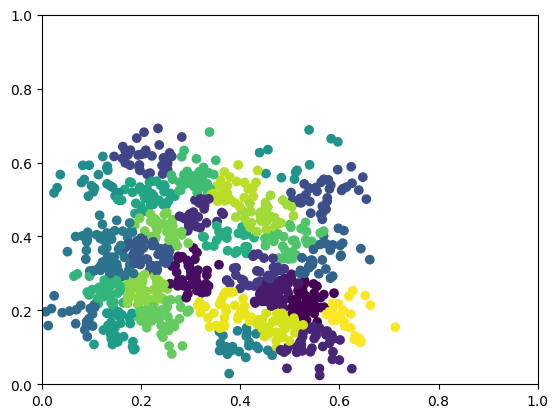

Number of iterations:  13


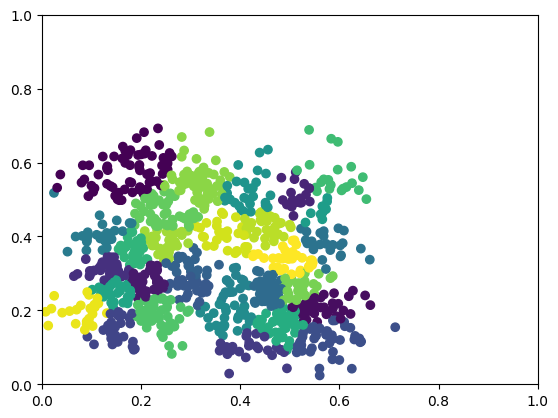

Number of iterations:  17


In [73]:
cluster(points, k, classic_dist, find_centroids_mean)
cluster(points, k, classic_dist, find_centroids_median)

After the execution of the two algorithms, we can see that increasing the number of clusters, the two algorithms have different results. In particular, the k-medians algorithm has a better performance than the k-means algorithm. This is because the k-medians algorithm uses to compute new centroids the median instead of the mean, which is more robust to outliers than the mean. 
This is because the median is the middle value of a sorted list of values, while the mean is the sum of the values divided by the number of values. So, if we have a list of values with an outlier, the median will be the middle value of the list, while the mean will be affected by the outlier.

## Exercise 2: Quantum K-Means (45 points) ##
Now you have to modify your implementation of k-means and move some of the component on quantum.

### Encoding ###
First step is to find out the best encoding for the input data points.
References about data encoding:
* Weigold et al., "Data encoding patterns for quantum computing" (https://dl.acm.org/doi/10.5555/3511065.3511068)
* P. Niemann, R. Datta, and R. Wille, Logic Synthesis for Quantum State Generation, IEEE 46th International Symposium on Multiple-Valued Logic, Springer (2016) pp. 247-252. (https://ieeexplore.ieee.org/abstract/document/7515556)
* M. Mttnen, J. Vartiainen, V. Bergholm, and M. M. Salomaa, Transformation of quantum states using uniformly controlled rotations, Quantum Information and Computation, 5 (2005) pp. 467-473. (https://dl.acm.org/doi/abs/10.5555/2011670.2011675)

In [74]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import *
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

DISCLAIMER: For the following tasks the results are the ones obtained on local simulators, since it takes too much time to run the circuits on IBMQ and retrieve the results everytime I modify something in the code.

In [75]:
# IBMQ.load_account() # load your account if you want to run on a real device
simulator = True
stv_backend = Aer.get_backend('statevector_simulator')
backend = None
if simulator:
    backend = Aer.get_backend('qasm_simulator')
else:
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator and x.status().operational==True))
backend = Aer.get_backend('qasm_simulator')

In [76]:
# amplitude encoding, returns the amplitudes of the encoded vector
def encode(point):
    return (1 / np.linalg.norm(point)) * np.array(point)

In [77]:
# returns statevector of the encoded point
def encode_stv(point):
    encoded = encode(point)
    n = len(encoded)
    q = QuantumRegister(n)
    qc = QuantumCircuit(q)
    qc.initialize(encoded, q)
    job = execute(qc, stv_backend)
    result = job.result()
    statevector = result.get_statevector(qc)
    return statevector

To encode the data points, I used the amplitude encoding. The amplitude encoding is a method to encode classical data into quantum states. The amplitude encoding is defined as:
$$
\left|x\right\rangle = \sum_{i=0}^{N-1}x_i\left|i\right\rangle
$$
where $x_i$ is the i-th element of the vector $x$ and $\left|i\right\rangle$ is the i-th basis vector. In this case, the basis vectors are the computational basis vectors $\left|0\right\rangle$ and $\left|1\right\rangle$.

I decided to define also a function which returns a statevector because in this way we can have a better visualization of the results. In fact, we can plot the statevector and see the amplitudes of the basis vectors, seeing how the data points are encoded.

### Identify which tasks can be executed on quantum devices ###
In this part, you should describe which part of the computation be executed on quantum devices. For each task, you should
* Identify the corresponding algorithm
* Provide a possible design for each algorithm, including possible data encoding

At the state of the art, there are some parts of the k-means algorithm that can be executed on quantum devices:
* DistCalc
* SwapTest
* GroverMin

Let's look in detail what they are used for.

### Distance computation ###

Let's first look at the distance computation between the points and the centroids, which can be executed using the **swap test** algorithm. This distance computation can be performed in 3 steps:
1. **State preparation**: the two states are prepared in the following way:
$$
\left|\psi\right\rangle = \frac{1}{\sqrt{2}}(\left|0\right\rangle\left|a\right\rangle + \left|1\right\rangle\left|b\right\rangle)
$$
$$
\left|\phi\right\rangle = \frac{1}{\sqrt{Z}}(\left|a\right|\left|0\right\rangle + \left|b\right|\left|1\right\rangle)
$$
$$
Z = \left|a\right|^2 + \left|b\right|^2
$$.

2. **Find overlap**: the overlap $\left\langle\psi\right|\left.\phi\right\rangle$ between the two states is computed using the swap test algorithm.
The swap test algorithm is performed using an ancilla qubit. The ancilla qubit is initialized in the state $\left|0\right\rangle$ and then we apply an Hadamard gate to it. Then, we apply a controlled swap gate between the ancilla qubit and the two states. Finally, we apply an Hadamard gate to the ancilla qubit and we measure it. The swap test is a way to measure the similarity between two states: from this we can derive a way to measure the distance between two states. 

3. **Calculate the distance**: the distance between the two states can be retrieved from the overlap using the following formulas (you can see the derivation of this formulas in the following paper: https://arxiv.org/ftp/arxiv/papers/2008/2008.10647.pdf):
$$
P(\left|0\right\rangle) = \frac{1}{2} + \frac{1}{2} \left| \left\langle\psi\right|\left.\phi\right\rangle \right|^2
$$
$$
dist = 2 Z \left| \left\langle\psi\right|\left.\phi\right\rangle \right|^2
$$ 


### Find nearest neighbors ###

The last step is to find the nearest neighbors. To do this we can compute the distance between the point and the centroids for each point using the distance computation algorithm. Then, we can find the centroid that is closest to the point. To do this in the classical version of the algorithm we search for the index of the centroid that is closest to the point, given the array of distances between the point and the centroids. At the end, the problem is reduced to the problem of finding the minimum element in an array.

In the quantum version of the algorithm, we could use two different approaches:
* **Grover's optimization**: we can use Grover's algorithm to find the index of the centroid that is closest to the point as described in the paper published by Durr and Hoyer in 1996. In this paper, the authors describe an algorithm that calls the quantum exponential searching algorithm (which is a generalization of the Grover’s quantum searching algorithm) as a subroutine to find the index of a smaller item than the value determined by a particular threshold index. 
Reference: https://arxiv.org/pdf/quant-ph/9607014.pdf
* **QUBO**: we can convert the problem of finding the minimum element in an array to an optimization problem. To translate it in quantum terms, we can use the QUBO formulation of the problem. 
Reference: https://medium.com/@aniruddha.connect/finding-smallest-number-of-an-array-with-quantum-computer-824386348fe0

The problem of both of these approaches is that they require a lot of qubits. 

For example, let's take the Grover's algorithm: the number of qubits required is $O(log_2(N))$, where $N$ is the number of elements in the array. This means that we need many qubits to encode the array of distances between the point and the centroids: if we have too many centroids, we need too many qubits to encode the array of distances. 

For this reason, I decided to use the classical version of the algorithm to find the nearest neighbors.

Finally, for some parts of the tasks, I relied on the following paper: *Fundamentals In Quantum Algorithms: A Tutorial Series Using Qiskit Continued* by Daniel Koch et al. (https://arxiv.org/ftp/arxiv/papers/2008/2008.10647.pdf)

### Implement quantum tasks ###
In the next cells, you should implement **AT LEAST ONE** identified quantum tasks. For the ones you do not implement, you should justify why you decided to not implement it in quantum version. Justification can be related to the limit of available quantum hardware. Add as many cells you need for your code and describe your implementation. 

#### Swap Test

In [78]:
# execute the swap test on 3 qubits: 
# 1 ancilla, 1 for the first state (phi), 1 for the second state (psi)
def swap_test(phi, psi, shots=50000):
    
    # initialize the circuit
    q1 = QuantumRegister(1, name='q1') # ancilla
    q2 = QuantumRegister(3, name='q2') # 2 states
    c = ClassicalRegister(1, name='c') # classical output
    qc = QuantumCircuit(q1, q2, c)
    qc.initialize(phi, q2[0]) # initialize phi
    qc.initialize(psi, q2[1:3]) # initialize psi

    # actual swap test
    qc.h(q1[0]) # put ancilla in superposition
    qc.cswap(q1[0], q2[0], q2[1]) # apply cswap
    qc.h(q1[0]) # put ancilla back to |0>
    qc.measure(q1, c) # measure ancilla

    # execute the circuit
    job = execute(qc, backend, shots = shots)
    job_result = job.result()
    counts = job_result.get_counts(qc) # get counts

    return counts

#### Dist Calc

In [79]:
def quantum_dist(A, B):
    
    shots = 20000
    
    # compute norms of points
    A_norm = np.linalg.norm(A)
    B_norm = np.linalg.norm(B)
    
    Z = A_norm ** 2 + B_norm ** 2 

    A_encoded = encode(A)
    B_encoded = encode(B)

    # initialize states phi and psi as vectors
    phi = [A_norm / sqrt(Z), - B_norm / sqrt(Z)]
    psi = [A_encoded[0] / sqrt(2), B_encoded[0] / sqrt(2), A_encoded[1] / sqrt(2), B_encoded[1] / sqrt(2)]

    # swap test
    counts = swap_test(phi, psi, shots)
    
    # calculate distance 
    distance = sqrt((2 * Z * abs((counts['0'] / shots - 0.5) / 0.5)))

    return round(distance, 4)

For the readibility and cleaness of the code, I decided to implement the distance computation integrating the amplitude encoding smoothly in the function, in this way I didn't have to deal with many statevectors.

Related to this, I got advantage of the *initialize* function of Qiskit, which allows to initialize a quantum circuit in a given state. In this way, I could initialize the circuit in the statevector of the point and the centroid.

### Compare executions ###
Execute both classic and quantum version of k-means and compare results. Add as many cells you need to run your code, describe your implementation and comment your results. 

#### Getting all together

We'll execute the quantum and the classical version just replacing the required functions in the parameters of the main function.
Since I had to run on the simulator the quantum version, I had to reduce the number of points.

In [80]:
k = 3  # Number of centers
n = 20  # number of data points
points, o_centers = create_dataset(n, k)  # dataset
points = preprocess(points)  # Normalize dataset

20


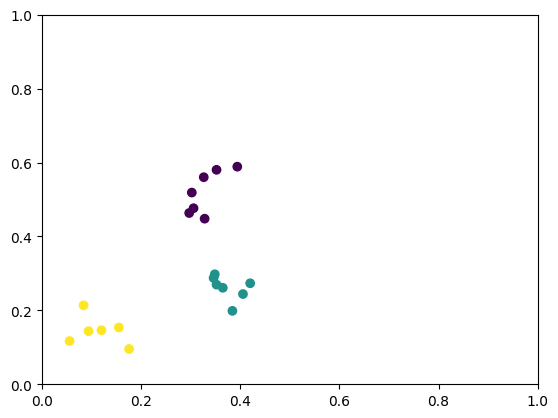

Number of iterations:  2


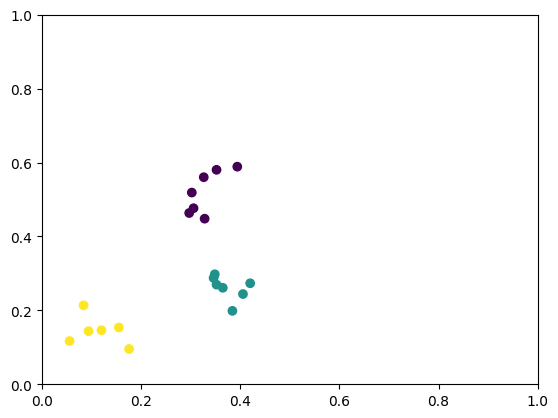

Number of iterations:  5


In [81]:
cluster(points, k, quantum_dist, find_centroids_mean)
cluster(points, k, classic_dist, find_centroids_mean)

Results of both algorithms are practically the same, the differences come only with the random initialization of the centroids. In fact, the centroids are initialized randomly, so the results can be different for each execution of the algorithm.

### Bonus question (15 points) ### 
* What would you need to change to implement the k-medians?
* Are there additional quantum tasks that you can have if you implement k-medians?

The alghoritm of Quantum k-medians proceeds as follows:
1. Use the *DistCalc* subroutine to compute the distance between the point and the centroids;
2. Store calculated distances in an array;
3. Use GroverMin

This algorithm is not changing compared to the k-means algorithm, the only difference is that we use median instead of the mean to update the centroids.

The first trivial solution to implement the k-medians is to modify the *find_centroids* function to classically compute the median instead of the mean, using the already implemented function.

Not so trivial, on the other hand we could add the *MedianCalc* subroutine. 
For this subroutine, I'll refer to the paper "Quantum K-medians Algorithm Using Parallel Euclidean Distance Estimator" by Amanuel T. Getachew (https://arxiv.org/ftp/arxiv/papers/2012/2012.11139.pdf).
In the article the subroutine is described as follows:
```
V = Accept a set of N dimensional points of size M
Min_dist = Quan_Parallel_dist(V[0], V)
Median = 0
for I = 1 up to M
    dist = Quan_Parallel_dist(V[i], V))
    If dist < Min_dist:
        Min_dist = dist
        Median = i
return Median
```
In this case, V will be the set of the clostest points for each centroid. The *Quan_Parallel_dist* subroutine relies on the Grover's algorithm to find the minimum element in an array. 

## Exercise 3: Quantum SVM (30 points) ##
In this exercise, you will apply quantum SVM to perform some basic classification task. You should perform training and evaluation for one of the selected datasets. Bonus points (up to 15) will be awarded if you perform dataset preprocessing.

### Data analysis with Quantum SVM ###

In [82]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit import Aer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

In [83]:
random_seed = 42

For the data preprocessing, I just normalized the data using the function *normalize()* from the sklearn library and removed the NaN values from the dataset. I used Pandas to handle these operations.

In [84]:
def dataset_preprocessing(dataset):
    # normalize the data
    data = preprocessing.normalize(dataset.data)
    # remove NaNs with pandas
    df = pd.DataFrame(data)
    df = df.dropna()
    # put all the data in a numpy array
    data = df.to_numpy()
    labels = dataset.target
    return [data, labels]

Let's load all the datasets

In [85]:
# load the data
iris_data = load_iris()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()

In [86]:
def get_qsvc(features, labels, qkernel):
    qsvc = QSVC(quantum_kernel=qkernel) # initialize the quantum SVC with the quantum kernel
    qsvc.fit(features, labels) # train the model
    return qsvc

In [87]:
def quantum_svc(dataset, qkernel):
    features = dataset.data # get the features
    labels = dataset.target # get the labels

    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.8, random_state=random_seed
    ) # split the dataset into train and test

    qsvc = get_qsvc(train_features, train_labels, qkernel)
    print(f"Quantum SVM accuracy: {qsvc.score(test_features, test_labels)}")
    pred = qsvc.predict(test_features) # predict the labels of the test set
    return qsvc, pred

To build a Quantum SVC, first we have to define the feature map. The feature map is a function that maps the input data into a quantum state: I used 3 different feature maps, which are the following (see below for the implementation):
* **ZZFeatureMap** 
* **ZFeatureMap**
* **PauliFeatureMap**

Then, we have to define the kernel function, which in this case is the quantum kernel function; each of them requires a feature map.

### Try different Feature Maps ###
Check the results of your model by training with different Feature Maps. Which one gives the best results?

In [88]:
def test_all_feature_maps(dataset):

    features = dataset_preprocessing(dataset) # preprocess the data
    feature_dimension = len(features[0]) # get the dimension of the features
    
    sampler = Sampler() # initialize the sampler
    fidelity = ComputeUncompute(sampler=sampler) # initialize the fidelity

    # initialize the quantum kernel with the ZZFeatureMap
    zz_qkernel = FidelityQuantumKernel(feature_map=ZZFeatureMap(feature_dimension=feature_dimension), fidelity=fidelity)
    # initialize the quantum kernel with the ZFeatureMap
    z_qkernel = FidelityQuantumKernel(feature_map=ZFeatureMap(feature_dimension=feature_dimension), fidelity=fidelity)
    # initialize the quantum kernel with the PauliFeatureMap
    pauli_qkernel = FidelityQuantumKernel(feature_map=PauliFeatureMap(feature_dimension=feature_dimension), fidelity=fidelity)
    
    print("ZZFeatureMap")
    qsvc1, pred1 = quantum_svc(dataset, zz_qkernel)
    print("ZFeatureMap")
    qsvc2, pred1 = quantum_svc(dataset, z_qkernel)
    print("PauliFeatureMap")
    qsvc3, pred1 = quantum_svc(dataset, pauli_qkernel)

Given the heavy computation, I managed to process only the Iris dataset in the simulator.

In [89]:
print("\nIris dataset\n")
test_all_feature_maps(iris_data)


Iris dataset



ZZFeatureMap
Quantum SVM accuracy: 0.7666666666666667
ZFeatureMap
Quantum SVM accuracy: 0.9333333333333333
PauliFeatureMap
Quantum SVM accuracy: 0.7666666666666667


I chose to use the accuracy as a metric to evaluate the model because the dataset is quite balancd and simple.
Between all the three feature maps, the one that gives the best results is the *ZFeatureMap*. In fact, the accuracy of the model is higher than the other two feature maps.

### Compare with classic SVM ###
Compare your results with classic SVM.

In [90]:
def get_svc(features, labels):
    qsvc = SVC()
    qsvc.fit(features, labels)
    return qsvc    

In [91]:
def classical_svc(dataset):
    features = dataset.data
    labels = dataset.target

    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.8, random_state=random_seed
    ) # split the dataset into train and test

    svc = get_svc(train_features, train_labels)
    print(f"Classical SVM accuracy: {svc.score(test_features, test_labels)}") # print the accuracy
    svc.predict(test_features)

In [92]:
classical_svc(iris_data)

Classical SVM accuracy: 1.0


For the classical SVM, I used the *SVC* function from the *sklearn.svm* library.
We can notice that the classical SVM algorithm has a better performance than the quantum SVM algorithm.